# Credit Card Fraud Detection:
## Exploring different models for fraud detection

In this notebook, we will be exploring a 2013 dataset of credit card transactions, gathered over 2 days, with only 492 frauds out of 284,807 total transactons. The deep imbalance of the dataset will require us to modify our samples. We will test all models with both oversampling sets and undersampling sets. 29 of the 31 columns are anonymized features, with only 'Time' and 'Amount' being unchanged. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The focus for this notebook will be in correctly finding fraud, rather than correctly labeling non-fraud. 

The models we will be testing are:
    1. Ordinary Least Squares
    2. Ridge Regression
    3. Random Forest
    4. Ensemble model



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline

In [4]:
ccdata = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/CreditCardFraudDetection/creditcard.csv')

ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
scaler = preprocessing.StandardScaler()
ccdata['ScaledAmount'] = scaler.fit_transform(ccdata['Amount'].values.reshape(-1, 1))
# scaling the 'Amount' column so it is in line with the rest of the PCA created features

In [6]:
ccdata.drop(['Amount'], axis=1, inplace=True)

## Preliminary Data Exploration



In [7]:
ccdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [8]:
ccdata.isnull().sum()

Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Class           0
ScaledAmount    0
dtype: int64

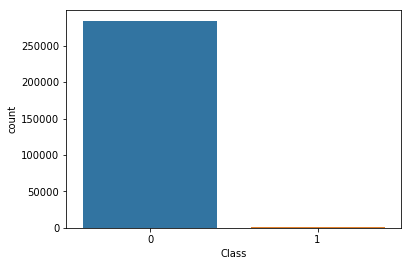

In [9]:
# Confirm class imbalance in data
sns.countplot("Class", data=ccdata)

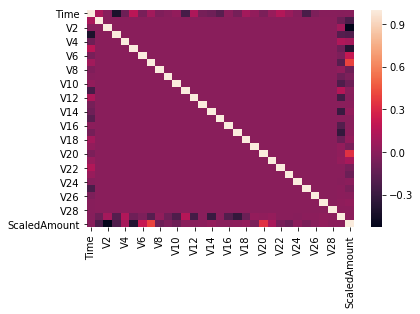

In [10]:
# check for correlation with our outcome variable
sns.heatmap(ccdata.corr())

## Sampling, Oversampling and Undersampling of our data 


In [11]:
def sampled_set(data, sample_count):
    sampled = np.random.choice(a=data, size=sample_count)
    return(sampled)

fraud_data = np.array(ccdata[ccdata['Class']==1].index)
honest_data = np.array(ccdata[ccdata['Class']==0].index)
fraud_sample_index = sampled_set(fraud_data, 500)

In [12]:
honest_sample_index = sampled_set(honest_data, 500)

In [13]:
def get_data(index_list1, index_list2, dataframe):
    combined_indexes = np.concatenate((index_list1, index_list2))
    located_data = dataframe.iloc[combined_indexes,:]
    return(located_data)

In [14]:
combined_index = np.concatenate((fraud_sample_index, honest_sample_index))
undersampled_data = ccdata.iloc[combined_index,:]
sample_y = undersampled_data['Class']
undersampled_X = undersampled_data.drop(['Class'])

In [15]:
oversampled_fraud_index = sampled_set(fraud_data, 100000)
oversampled_honest_index = sampled_set(honest_data, 100000)
oversampled_combined_index = np.concatenate((oversampled_fraud_index, oversampled_honest_index))
oversampled_data = ccdata.iloc[oversampled_combined_index,:]
oversampled_y = oversampled_data['Class']
oversampled_X = oversampled_data.drop(['Class'])

In [27]:
all_X = ccdata.drop(['Class'], axis=1)
all_y = ccdata['Class']

## Setting up a tool to model and test our data

In [16]:
def model_testing(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scored_model_train = model.score(X_train, y_train)
    scored_model_test = model.score(X_test, y_test)
    model_scoreit = score_it(y_test, y_pred)
    print("Model Score with Training data:")
    print(scored_model_train)
    print("Model Score with Testing data:")
    print(scored_model_test)
    
    

In [17]:
# scoring these thingies! 
from sklearn.metrics import recall_score, precision_score, f1_score

def score_it(y_true, y_pred):
    print("Recall Score:")
    print(recall_score(y_true, y_pred))
    print("Precision Score:")
    print(precision_score(y_true, y_pred))
    print("F1 Score:")
    print(f1_score(y_true, y_pred))

# Modeling the Data
## Test a logisitc regression with our undersampled data

In [38]:
logr = linear_model.LogisticRegression(C=.01)
model_testing(logr, undersampled_X, sample_y, .3)

Recall Score:
0.945205479452
Precision Score:
0.985714285714
F1 Score:
0.965034965035
Model Score with Training data:
0.93
Model Score with Testing data:
0.966666666667


## Testing a Ridge Classifier

In [47]:
# Ridge Regression here
ridgeC = linear_model.RidgeClassifier()
model_testing(ridgeC, undersampled_X, sample_y, .03)

Recall Score:
1.0
Precision Score:
1.0
F1 Score:
1.0
Model Score with Training data:
1.0
Model Score with Testing data:
1.0


## Testing Random Forest Classifier

In [54]:
# Random Forest here
forest = ensemble.RandomForestClassifier(n_estimators=500, max_depth=2)
model_testing(forest, undersampled_X, sample_y, .3)

Recall Score:
0.940789473684
Precision Score:
1.0
F1 Score:
0.969491525424
Model Score with Training data:
0.97
Model Score with Testing data:
0.97


# Oversampling the fraud data

## Logisitic Regression with oversampled data

In [40]:
model_testing(logr, oversampled_X, oversampled_y, .3)

Recall Score:
0.893702353331
Precision Score:
0.982867349543
F1 Score:
0.936166519105
Model Score with Training data:
0.937107142857
Model Score with Testing data:
0.938716666667


## Ridge Regression Classifier with Oversampled Data

In [22]:
model_testing(ridgeC, oversampled_X, oversampled_y, .3)

Recall Score:
1.0
Precision Score:
1.0
F1 Score:
1.0
Model Score with Training data:
1.0
Model Score with Testing data:
1.0


## Random Forest Classifier with Oversampled Data

In [41]:
model_testing(forest, oversampled_X, oversampled_y, .3)

Recall Score:
0.928427959293
Precision Score:
0.999819748369
F1 Score:
0.962802242627
Model Score with Training data:
0.964535714286
Model Score with Testing data:
0.964283333333


# Doing a round with all the data

In [42]:
model_testing(logr, all_X, all_y, .3)

Recall Score:
0.659863945578
Precision Score:
0.729323308271
F1 Score:
0.692857142857
Model Score with Training data:
0.999077065067
Model Score with Testing data:
0.998993481034


In [43]:
model_testing(ridgeC, all_X, all_y, .3)

Recall Score:
0.427586206897
Precision Score:
0.826666666667
F1 Score:
0.563636363636
Model Score with Training data:
0.998861379186
Model Score with Testing data:
0.998876443945


In [44]:
model_testing(forest, all_X, all_y, .3)

Recall Score:
0.570469798658
Precision Score:
0.867346938776
F1 Score:
0.688259109312
Model Score with Training data:
0.999092112919
Model Score with Testing data:
0.999098814414


## Bringing it all together

We are prioritizing finding fraud over correctly labeling non-fraud. As such, we are using recall_score as our measure for these models performance.

After running our models with our different sets of sampled data, and the full data set, we find that Ridge Classifier provides us with the highest recall score. The score is 1.0 on a 0-1 scale, and all the scores for that model returned a 1, making me suspicious of the accuracy of the score. The next best score of .9452 was earned by Logistic Regression with undersampled X data, and C=.01. 